<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="https://drive.google.com/uc?export=view&id=1LkStfZqwS8AOm_xja6KDWWQMQV2ijrDu" width = "300" align="center"/>

EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
df.head(12)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

<ipython-input-4-931578e3547c>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  t_profit = df[{'month_number','total_profit'}]


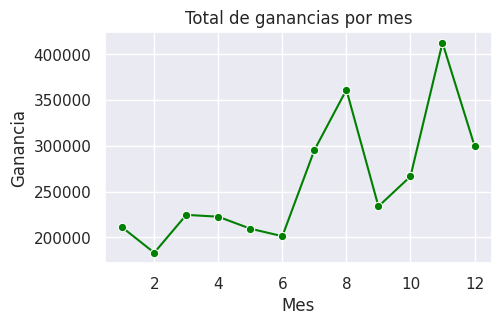

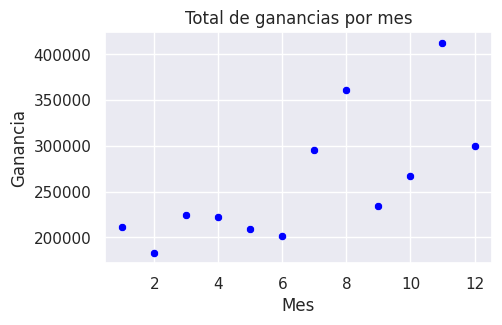

In [ ]:
# total_profit tabla
t_profit = df[{'month_number','total_profit'}]

# Crear gráfico de lineas
plt.figure(figsize = (5,3))
sns.lineplot(x = 'month_number', y = 'total_profit', data = t_profit, marker = 'o', color = "green")

plt.xlabel('Mes')
plt.ylabel('Ganancia')
plt.title('Total de ganancias por mes')

# Crear gráfico de dispersión
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'month_number', y = 'total_profit', data = t_profit, marker = 'o', color = "blue")

plt.xlabel('Mes')
plt.ylabel('Ganancia')
plt.title('Total de ganancias por mes')

plt.show()

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

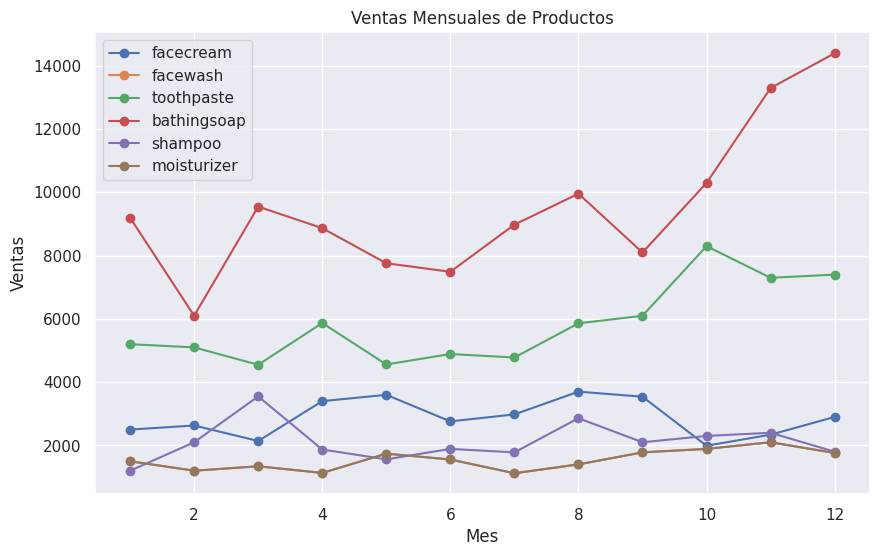

In [11]:
# Obtener los valores de productos
products = df.columns[1:7] # En este paso, asumimos que las columnas de ventas son las que van del 1 al 6

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize = (10,6))

# Graficar cada linea para cada producto
for product in products:
  sales = df[product]
  ax.plot(df['month_number'], sales, marker='o', label=product)

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas')
ax.set_title('Ventas Mensuales de Productos')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()



3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

<ipython-input-6-6d630985b887>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_face = df[{'month_number','facecream', 'facewash'}]


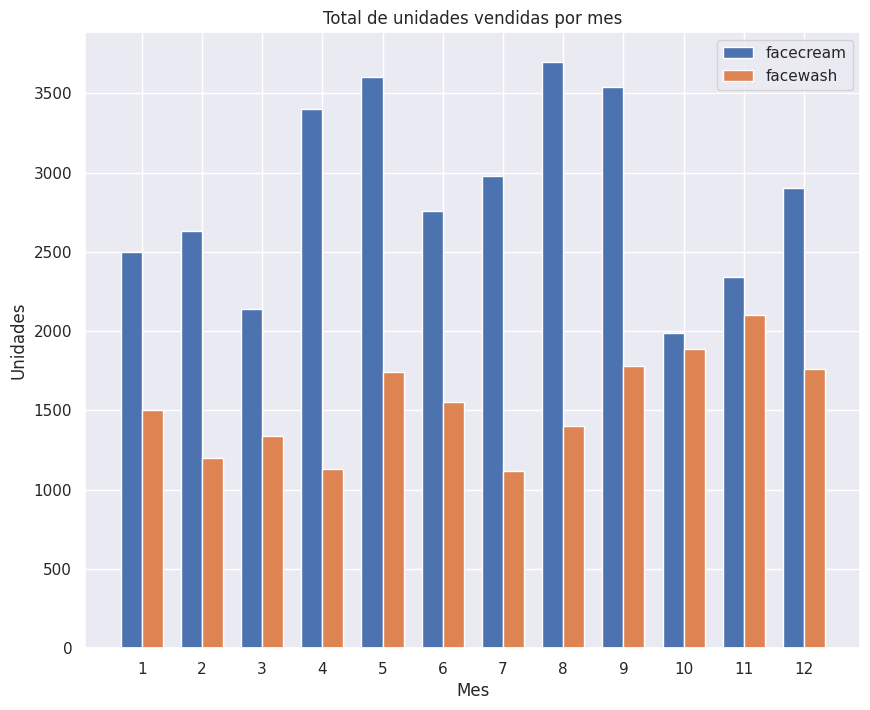

In [ ]:
# Datos para las variables independientes
df_face = df[{'month_number','facecream', 'facewash'}]

# Posiciones de las barras en el eje x
x = range(len(df_face))

# Ancho de las barras
width = 0.35

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar las barras de ambos productos
rects1 = ax.bar(x, df_face['facecream'], width, label='facecream')
rects2 = ax.bar([i + width for i in x], df_face['facewash'], width, label='facewash')

ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels([i for i in df_face['month_number']])
ax.legend()

# Mostrar el gráfico
plt.xlabel('Mes')
plt.ylabel('Unidades')
plt.title('Total de unidades vendidas por mes')
plt.show()

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

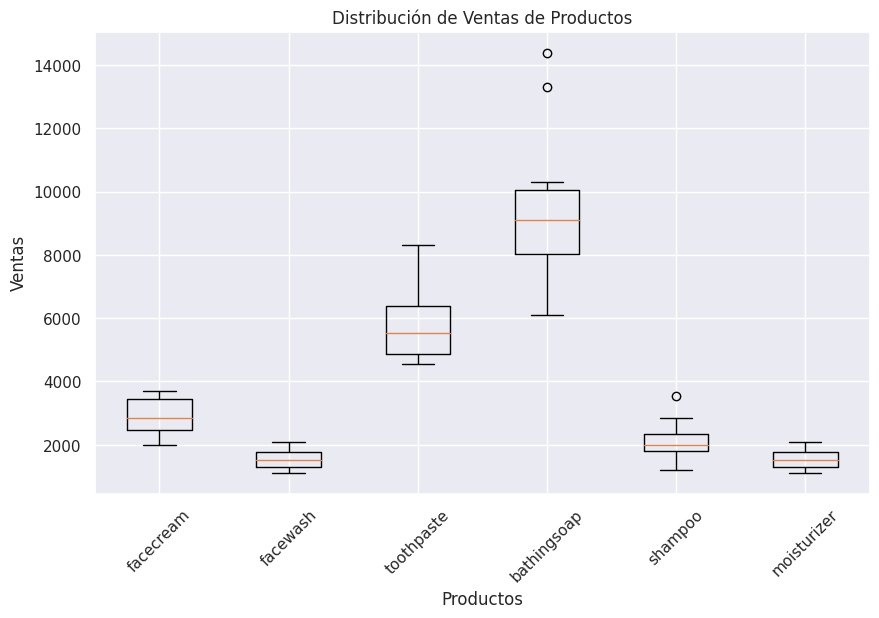

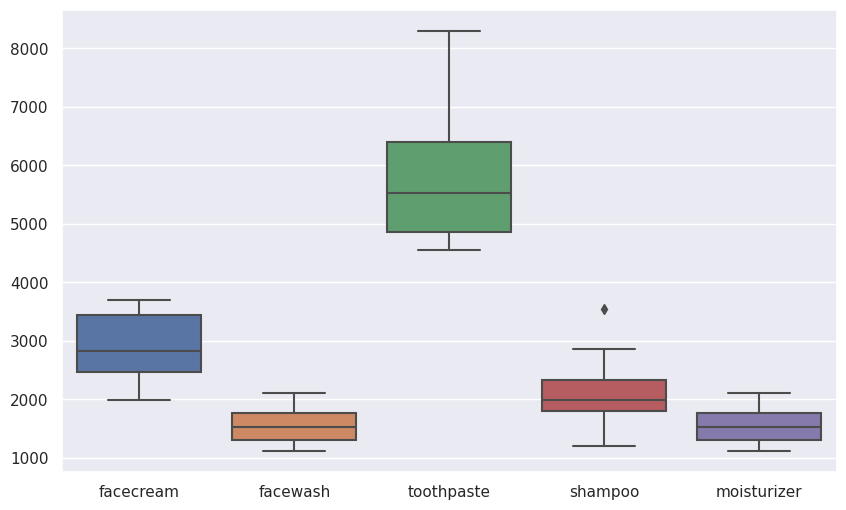

In [ ]:
# Obtener los datos de ventas de productos
product_data = df.iloc[:, 1:7]

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize = (10,6))

# Graficar el box-plot
ax.boxplot(product_data.values)

# Configurar las etiquetas de los ejes y titulo
ax.set_xticklabels(df.columns[1:7], rotation=45)
ax.set_xlabel('Productos')
ax.set_ylabel('Ventas')
ax.set_title('Distribución de Ventas de Productos')

# Mostrar el gráfico de box-plot
plt.grid(True)

# Pre-format DateFrame
cols = ['facecream', 'facewash', 'toothpaste', 'shampoo', 'moisturizer']
stats_df = df[cols]

# New boxplot using stats_df
plt.figure(figsize = (10,6))
sns.boxplot(data = stats_df)
plt.show()

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

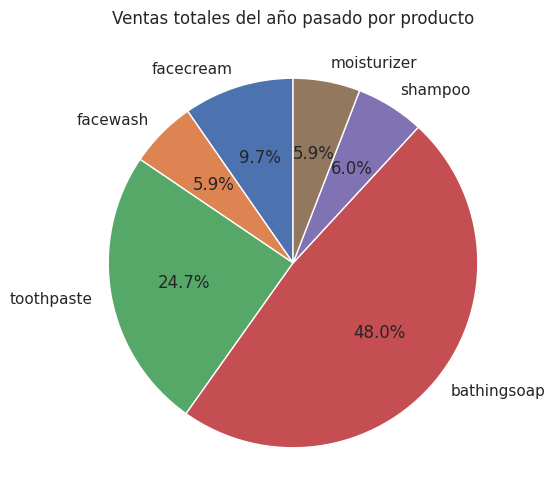

In [ ]:
# Filtrar los datos del año pasado
last_year_data = df[df['month_number'] >= 12]

# Calcular las ventas totales del año pasado para cada producto
product_sales = last_year_data.iloc[:,1:7].sum()

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10,6))

# Graficar el gráfico circular
ax.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=90)

# Configurar el título del gráfico
ax.set_title('Ventas totales del año pasado por producto')

# Mostrar el gráfico circular
plt.show()